## Implementing Self Organizing Maps for Fraud Detection

Let's imagine we are deep learning scientists working for a bank and we are given a data set that contains information of customers from this bank applying for an advanced credit card.

So basically, these informations are the data that customers had to provide when filling the application form. And our mission, is to detect potential fraud within these applications. So that means that by the end of the mission, we have to give the explicit list, of the customers who potentially cheated. So our goal is very explicit, we have to return something. 

However, to return this something, that is the list of potential fraudulent customers, we will not make a supervised deep learning model and try to predict if each customer potentially cheated, yes or no, you know, with a dependent variable that has binary values. No, this is not what we're gonna do. What we're gonna do is unsupervised deep learning, which means that we will identify some patterns in a high dimensional data sets full of nonlinear relationships.

And one of these patterns will be the potential fraud. That is the customers who potentially cheated.

In [78]:
# Library imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

### Data Load

In [79]:
dataset = pd.read_csv("D:\\ML-Datasets\\Udemy-DeepLearning\\Credit_Card_Applications.csv")

# Check the data load
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [80]:
# Check for any missing values
dataset.isna().sum()

CustomerID    0
A1            0
A2            0
A3            0
A4            0
A5            0
A6            0
A7            0
A8            0
A9            0
A10           0
A11           0
A12           0
A13           0
A14           0
Class         0
dtype: int64

### Data Preparation

* The unsupervised deep learning model is going to identify some patterns. Well, by patterns, I mean customers, so it's going to do some kind of customer segmentation to identify segments of customers and one of the segments will contain the customers that potentially cheated.<br><br>

* Now let's go deeper into the details of what this first unsupervised deep learning model is going to do, with all these customers. So first of all, all these customers are the input, these customers are the inputs of our neural network. And then what happens is that these input points are going to be mapped to a new output space. And between the input space and the output space, we have this neural network composed of neurons, each neuron being initialized as a vector of weights that is the same size as the vector of customer that is a vector of 15 elements, because we have the customer ID plus 14 attributes. And so for each observation point that is for each customer, he output of this customer, will be the neuron hat is the closest to the customer. So basically, in the network, we pick the neuron that is the closest to the customer. And remember, this neuron is called the winning node, for each customer, the winning node is the most similar neuron to the customer, then, you know, we use a neighborhood function like the galch neighborhood function, to update the weight of the neighbors of the winning node to move them closer to the point.<br><br>

* And we do this for all the customers in the input space. And we'll repeat that again. We'll repeat all this many times. And each time we'll repeat it, the output space decreases and loses dimensions. It reduces its dimension little by little. And then it reaches a point where the neighborhood stops decreasing, where the output space stops decreasing. nd that's the moment where we obtained our self organizing map in two dimensions with all the winning nodes that were eventually identified. And so now we're getting closer to the frauds.<br><br>

* So the frauds are actually the outlying neurons in this two dimensional self organizing map, simply because the outline neurons are far from the majority of neurons that follow the rules.<br><br>

* And so now the question is, how can we detect the outline neurons in the self organizing map? Well, for this, we need the MID, the Mean Interneuron Distance. That means that in our self organizing map for each neuron, we're going to compute the mean of the Euclidean distance between this neuron and the neurons in its neighborhood. And so what neighborhood is that? Well, we have to define it manually. But we define a neighborhood for each neuron. And we compute the mean of the Euclidean distance between this neuron that we picked and all the neurons in the neighborhood that we defined. And by doing that we can detect outliers, because outliers will be far from all the neurons in its neighborhood.<br><br>

* And then we'll use an inverse mapping function to identify which customers originally in the input space are associated to this winning node, that is an outlier.

Now we need to split the data sets into two subsets, the sets that contain all the variables from customer ID to attribute number 14, and the class that is the variable that tells if yes or no the application of the customer was approved. So zero is no, the application was not approved. And one means yes, the application was approved. And so we want to separate all these variables here and the variable class here, so that's on the self organizing map, we can clearly distinguish the customers who weren't approved their application and the customers who got approval, because then that will be useful, for example, if we want to detect in priority, the fraudulent customers who got their applications approved.

In [81]:
# seggregating two sets
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

So now there is an important point to make, we splited our data sets into x and y. But be careful we did not do that because we're doing some supervised learning, we're not trying to make a model that will predict zero or one in the end. We're just doing this to make the distinction in the end between the customers who were approved and the customers who were not approved. 

Also when we train our self organizing map we will only use x because we are doing some unsupervised deep learning, that means that no dependent variable is considered.

In [82]:
# Feature Scaling

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)

### Build and train the SOM

Because we're doing some unsupervised learning. That is, we are trained to identify some patterns inside the independent variables that are contained in x and we don't use the information of the dependent variable. We don't consider that information in y here.

* The first argument is So as we can see here, the first arguments are x and y which are of course the dimensions of the gridto self-organizing map. So here the choice is pretty arbitrary. We can choose whatever dimensions we want for our self-organizing map. It must not be too small because we want to get the outliers pretty in evidence and only if you want to be very accurate with your search of outliers well, you can make a bigger map. But here, we don't have that much observations. We don't have that much customers in our dataset Credit card applications, so we're just gonna make a 10 by 10 grid and therefore, here we're going to input x equals 10 and y equals 10.<br><br>

* The next parameter input_len is the number of features we have in our data <br><br>
* The next parameter sigma is the radius of the neighbourhood - we will keep the default value <br><br>
* and then we have the learning rate, which remember is this hyper-parameter that decides by how much the weights are updated during each iteration. So the higher is the learning rate, the faster there will be convergence and the lower is the learning rate, the longer the self-organizing map will take time to be built. And so same here, we're gonna keep it to default value 0.5<br><br>
* Finally we have the decay function parameter that can be used to improve the convergence. But here we're going to leave it to none and not use a decay.

In [83]:
# We will use an implementation of SOM in Python and the code is present in minisom.py
# We will import the file and class

from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len=X.shape[1], sigma=1.0, learning_rate=0.5)

A quick recap on the training steps for SOM

<img src = "resources\Annotation 2019-11-10 200310.png" />

In [84]:
# Now we will initialize the weights
som.random_weights_init(X)

# Now we will train for number of iterations 
som.train_random(data=X, num_iteration=100)

### Analyze and Visualize the results

What we are about to see is clearly there's two dimensional grid that will contain all the final winning nodes and for each of these winning nodes we will get what is most important for us that is, the MID; the Mean Interneuron Distance. And I remind that the MID of a specific winning node is the mean of the distances of all the neurons around the winning node inside a neighborhood that we defined.

And so basically the higher is the MID Then the more the winning node will be far away from it's neighbors. Inside a neighborhood. And therefore the higher is the MID, the more the winning node is an outlier.

In [85]:
# import libraries for visualizations
from pylab import bone, pcolor, colorbar, plot, show

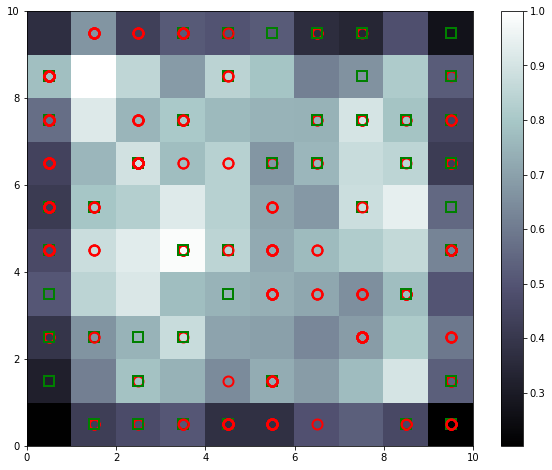

In [86]:
plt.figure(figsize=(10,8))

# initialize the window that will contain the map
bone()

# Then we are going to add all the mean interneron distances of the winning nodes and represent them as colors
# to get things in right order for pcolor we need to take the transpose matrix
pcolor(som.distance_map().T)

# Now in order to understand, which color corresponds to a high or low MID
colorbar()

# Now we are going to create markers
markers = ['o', 's'] # 'o' is for circle and 's' is for square
colors = ['r', 'g']

# now in order to establish an association between markers and colors, we are going to loop through all customers
# and if a customer's application was not approved, we will mark it as 'red circle' and if approved 'green square'

for i, j in enumerate(X): # i is the index for every customer (row) and j is the entire vector(all columns) for that row
    w = som.winner(j) # Now we will get the winning node for that vector
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]], markeredgecolor =  colors[y[i]],
        markerfacecolor = 'None', markersize = 10,
        markeredgewidth = 2)
show()

So we see the white ones are the with the highest MIDs and the black ones are closest to the datapoints. Now we can get to the next step to get the explicit list of the customers, by just proceed to the inverse mapping of this winning node to see which customers are associated to this winning node.

We also see that there are some white nodes, where some customers are approved credit, even if we think the white boxes are potential frauds. 

### Associating the SOM to the actual data points

In [87]:
# Finding the frauds
# This returns a dictionary, with the coordinates of the winning nodes and list of customers falling within that winning node
mappings = som.win_map(data=X)
frauds = np.concatenate((mappings[(3, 4)], mappings[(7, 7)]), axis=0)

# Now we use the inverse transform to get the actual values
frauds = sc.inverse_transform(frauds)
# Convert to dataframe
frauds = pd.DataFrame(frauds)

# Show the dataframe
frauds.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15786237.0,0.0,19.17,0.585,1.0,6.0,4.0,0.585,1.0,0.0,0.0,1.0,2.0,160.0,1.0
1,15767358.0,0.0,49.83,13.585,2.0,4.0,8.0,8.500,1.0,0.0,0.0,1.0,2.0,0.0,1.0
2,15740487.0,0.0,49.00,1.500,2.0,5.0,3.0,0.000,1.0,0.0,0.0,1.0,2.0,100.0,28.0
3,15811742.0,0.0,36.75,5.125,2.0,10.0,4.0,5.000,1.0,0.0,0.0,1.0,2.0,0.0,4001.0
4,15802869.0,0.0,30.25,5.500,2.0,4.0,4.0,5.500,0.0,0.0,0.0,1.0,1.0,100.0,1.0
